<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/Get_hands_on_and_use_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Licensed under the Apache License, Version 2.0

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
-O /tmp/horse-or-human.zip

--2021-01-02 10:27:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   102MB/s    in 1.4s    

2021-01-02 10:27:19 (102 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
-O /tmp/validation-horse-or-human.zip

--2021-01-02 10:27:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 74.125.69.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  51.7MB/s    in 0.2s    

2021-01-02 10:27:19 (51.7 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
hh = '/tmp/horse-or-human'
vhh = '/tmp/validation-horse-or-human'

In [4]:
import os
import zipfile

local_zip = '{}.zip'.format(hh)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(hh)

local_zip = '{}.zip'.format(vhh)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(vhh)

zip_ref.close()

In [5]:
train_horse_dir = os.path.join('{}/horses'.format(hh))
train_human_dir = os.path.join('{}/humans'.format(hh))

validation_horse_dir = os.path.join('{}/horses'.format(vhh))
validation_human_dir = os.path.join('{}/humans'.format(vhh))

In [6]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])
print(validation_horse_names[:10])
print(validation_human_names[:10])

['horse13-3.png', 'horse18-1.png', 'horse39-5.png', 'horse40-0.png', 'horse01-6.png', 'horse29-6.png', 'horse21-9.png', 'horse20-4.png', 'horse26-2.png', 'horse32-6.png']
['human05-08.png', 'human07-19.png', 'human10-03.png', 'human16-28.png', 'human12-11.png', 'human07-09.png', 'human16-04.png', 'human14-13.png', 'human09-05.png', 'human17-22.png']
['horse1-568.png', 'horse3-440.png', 'horse4-439.png', 'horse1-298.png', 'horse2-368.png', 'horse2-294.png', 'horse4-000.png', 'horse2-112.png', 'horse6-198.png', 'horse5-342.png']
['valhuman01-22.png', 'valhuman03-23.png', 'valhuman05-06.png', 'valhuman02-01.png', 'valhuman03-03.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman02-00.png', 'valhuman05-04.png', 'valhuman01-03.png']


In [7]:
print('total traininghorse images : ', len(os.listdir(train_horse_dir)))
print('total traininghuman images : ', len(os.listdir(train_human_dir)))
print('total validationhorse images : ', len(os.listdir(validation_horse_dir)))
print('total validationhuman images : ', len(os.listdir(validation_human_dir)))

total traininghorse images :  500
total traininghuman images :  527
total validationhorse images :  128
total validationhuman images :  128


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [9]:
nrows = 4; ncols = 4; pic_index = 0

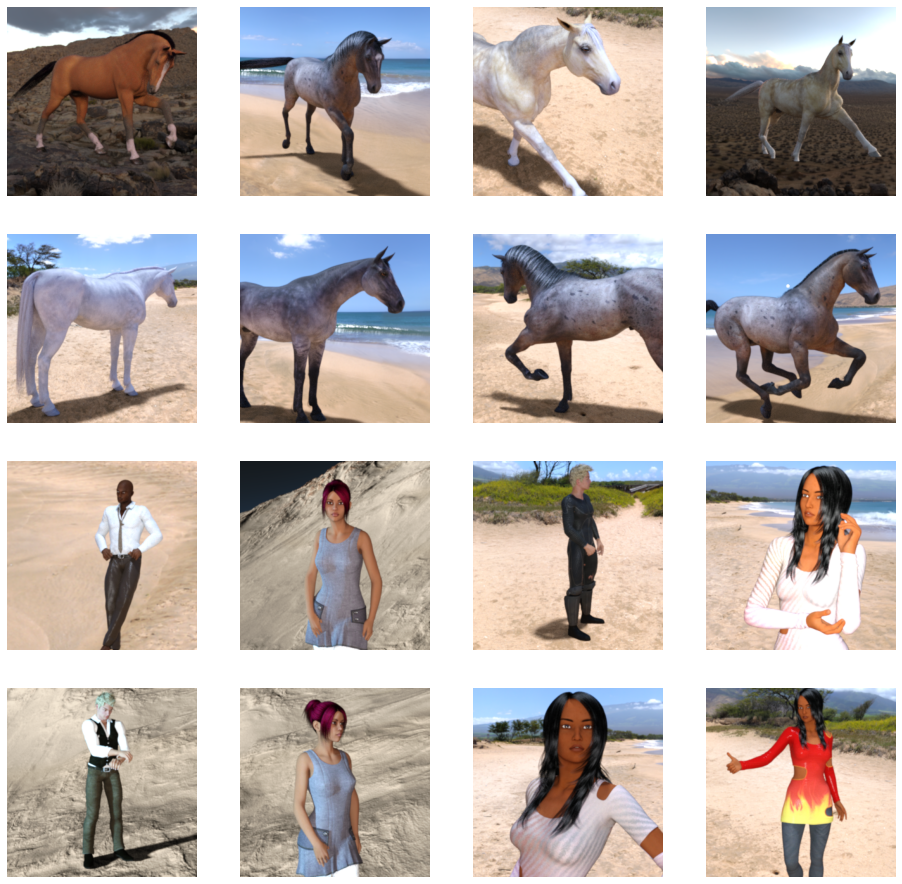

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8 : pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8 : pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix) :

  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Building a Small Model from Scratch

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [14]:
from tensorflow.keras.optimizers import RMSprop

In [15]:
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Data Preprocessing

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300, 300), # 모든 이미지의 크기를 300x300로 다시 만들어준다.
    batch_size = 128,
    class_mode = 'binary' # loss로 binary_crossentropy를 사용하므로 binary labels가 필요하다.
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8,
)

Epoch 1/15
8/8 [==============================] - 82s 10s/step - loss: 0.7400 - accuracy: 0.4555 - val_loss: 0.5911 - val_accuracy: 0.8203
Epoch 2/15
8/8 [==============================] - 79s 10s/step - loss: 0.9209 - accuracy: 0.7213 - val_loss: 0.9441 - val_accuracy: 0.5977
Epoch 3/15
8/8 [==============================] - 79s 10s/step - loss: 0.4596 - accuracy: 0.8071 - val_loss: 1.4730 - val_accuracy: 0.7812
Epoch 4/15
8/8 [==============================] - 91s 11s/step - loss: 0.2549 - accuracy: 0.9012 - val_loss: 1.1474 - val_accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 79s 10s/step - loss: 0.2217 - accuracy: 0.8985 - val_loss: 2.4188 - val_accuracy: 0.7227
Epoch 6/15
8/8 [==============================] - 79s 10s/step - loss: 0.3115 - accuracy: 0.8850 - val_loss: 0.9914 - val_accuracy: 0.8711
Epoch 7/15
8/8 [==============================] - 78s 10s/step - loss: 0.5841 - accuracy: 0.8119 - val_loss: 1.7579 - val_accuracy: 0.8281
Epoch 8/15
8/8 [===========

## Running the Model

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [26]:
uploaded = files.upload()

for fn in uploaded.keys() :
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300, 300))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(classes[0])

  if classes[0] > 0.5 :
    print(fn + ' is a human')
  else :
    print(fn + ' is a horse')

Saving ww.png to ww (1).png
[0.]
ww.png is a horse


## Visualizing Intermediate Representations

In [27]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


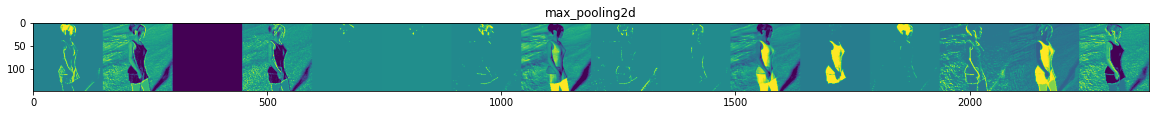

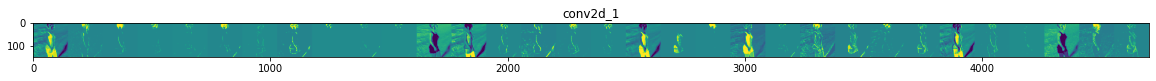

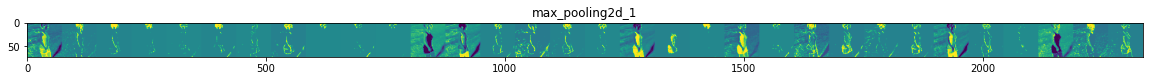

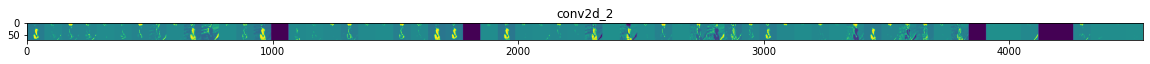

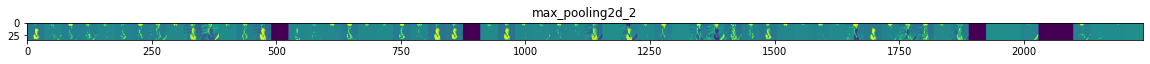

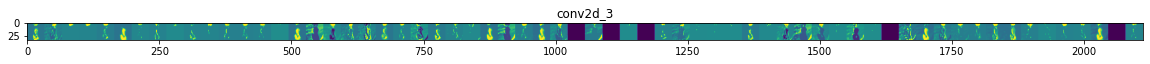

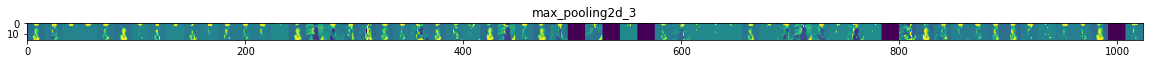

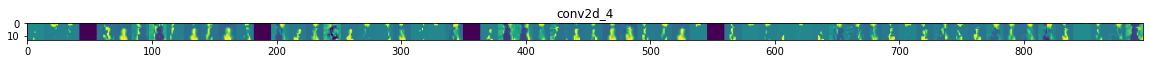

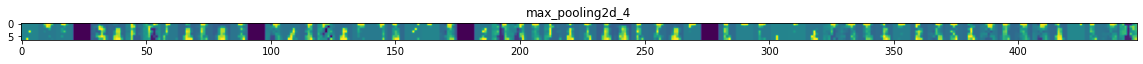

In [41]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size = (300, 300))
x = img_to_array(img)         # shape를 (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array shape을 (1, 150, 150, 3)으로 만들어 준 것임.
x /= 255

successive_feature_maps = visualization_model.predict(x)

layers_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layers_names, successive_feature_maps) :
  if len(feature_map.shape) == 4 :
      n_features = feature_map.shape[-1]
      size = feature_map.shape[1]
      display_grid = np.zeros((size, size * n_features))

      for i in range(n_features) :
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')

        display_grid[:, i*size : (i+1)*size] = x

      scale = 20. / n_features
      plt.figure(figsize = (scale * n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')